# Phase Unwrapping

The goal of this notebook is to read an interferogram image (i.e., 2-D array of phase values) and unwrap it. Phase unwrapping is a critical process in interferometry, which involves recovering unambiguous phase data from the interferogram.

A SAR interferogram represents the phase difference between two radar acquisitions (i.e., two SLC images). The phase difference is usually wrapped within a range of 0 to 2π, because the phase is inherently cyclical. When the true phase difference exceeds 2π, it gets "wrapped" into this range, creating a discontinuous phase signal. Phase unwrapping refers to the process of reconstructing the continuous phase field from the wrapped phase data.

Unwrapping an interferogram is essential for extracting correct information contained in the phase such as surface topography and earth surface deformations.

There are many approaches that tried to solve the unwrapping problem, tackling challenging scenarios involving noise or large phase discontinuities. Here we present the Network-flow Algorithm for phase unwrapping (C. W. Chen and H. A. Zebker, 2000), which is implemented in the `snaphu` package.

## Loading Data
The data is stored on the Jupyterhub server, so we need to load it using their respective paths.
In this notebook we will use the resulting wrapped interferogram from notebook "Interferograms", but we need to process it in the radar geometry in order to unwrap it (while in notebook "Interferograms" we end the whole process by performing the geocoding, just for better visualization purposes).


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
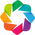

/home/nicola/Documents/work/teaching/notebooks/microwave-remote-sensing/.conda_envs/microwave-remote-sensing/lib/python3.11/abc.py:106: FutureWarning: xarray subclass DatasetHasLandCoverSig0 should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)
/home/nicola/Documents/work/teaching/notebooks/microwave-remote-sensing/.conda_envs/microwave-remote-sensing/lib/python3.11/abc.py:106: FutureWarning: xarray subclass DatasetHasIntensity should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)
/home/nicola/Documents/work/teaching/notebooks/microwave-remote-sensing/.conda_envs/microwave-remote-sensing/lib/python3.11/abc.py:106: FutureWarning: xarray subclass DatasetHasIntensityPhase should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)
/home/nicola/Documents/work/teaching/notebooks/microwave-remote-sensing/.conda_envs/microwave-remote-sensing/lib/python3.11/abc.py:10

In [1]:
import intake
import numpy as np
import seaborn as sns
import snaphu  # noqa: F401
import xarray as xr

from mrs.catalog import get_intake_url
from mrs.plot import (
    plot_coarsened_image,
    plot_compare_coherence_mask_presence,
    plot_compare_wrapped_unwrapped_completewrapped,
    plot_different_coherence_thresholds,
    plot_displacement_map,
    plot_interferogram_map,
    plot_summary,
)
from mrs.processing import subsetting, unwrap_array

In [2]:
url = get_intake_url()
catalog = intake.open_catalog(url)
ds = catalog.complex.read().compute()
ds["cmplx"] = ds["real"] + ds["imag"] * 1j

https://git.geo.tuwien.ac.at/public_projects/microwave-remote-sensing/-/raw/main/microwave-remote-sensing.yml


In [3]:
# Set cyclic and linear colormaps
cmap_cyc = sns.color_palette("hls", as_cmap=True)  # "cmc.romaO"
cmap_lin = "cmc.roma_r"
cmap_disp = "cmc.vik"

# Create a mask for the areas which have no data
mask = ds.phase.where(ds.phase == 0, True, False).astype(bool)  # noqa FBT003

Let's start by displaying the interferogram that needs to be unwrapped. Recall that due to the Slant Range geometry and the satellite acquisition pass (ascending, in our case), the image appears north/south flipped (with respect to the geocoded image)!


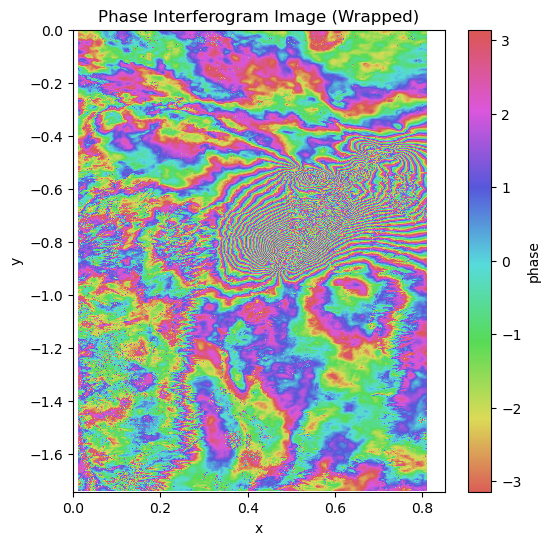

In [4]:
# Plot Phase Interferogram Image

plot_interferogram_map(ds, mask, cmap_cyc)

## Phase Unwrapping

As we will be doing the unwrapping multiple times in this notebook let's create a function that does the unwrapping for us on `xarray DataArray` objects.
The actual core function where the unwrapping is happening is `snaphu.unwrap_phase` from the `snaphu` package. This function needs a 2D numpy array as input, where each pixel value is a complex number.
Therefore, we have to convert the `xarray DataArray` to a 2D numpy array with complex values. We do that by combining the phase and intensity bands to a complex array.
The actual unwrapping is essentially an addition of the phase values, such that the values are continuous and not between $-\pi$ and $\pi$.

![](https://forum.step.esa.int/uploads/default/original/3X/5/d/5d9d18e2a3121a4bb80cb93a8f62aed742e35fc2.png)

*Figure 1: Illustration of how the unwrapping of the phase works. (Source: ESA)*.


### Unwrapping on a Subset

As the original image is too large to unwrap in a reasonable time, we will unwrap a subset of the image. In this case, we will unwrap an area of 500x500 pixels.


In [5]:
# Select a subset of the data
dx, dy = 500, 500
x0, y0 = 2800, 1700


# Subsetting the data arrays
subset = subsetting(ds.where(mask), x0, y0, dx, dy)

# Unwrap the subset
subset = unwrap_array(subset, complex_var="cmplx", ouput_var="unwrapped")

Now let's compare the wrapped and unwrapped phase images.


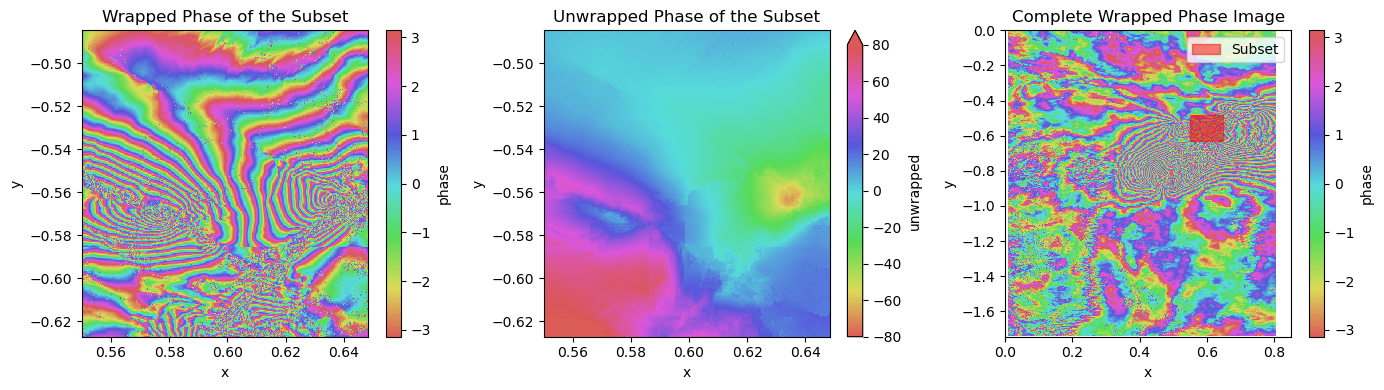

In [6]:
plot_compare_wrapped_unwrapped_completewrapped(
    subset, cmap_cyc, ds, mask, x0, y0, dx, dy
)

### Unwrapping with coherence mask
Additionally, can we try to calculate the unwrapped image by excluding pixels which the coherence values are lower than a certain threshold. This is done by masking the coherence image with the threshold value and then unwrapping the phase image with the masked coherence image.


In [7]:
threshold1 = 0.3

subset_unwrapped_coherence = unwrap_array(
    subset,
    coherence=subset.coh,
    coh_low_threshold=threshold1,
    complex_var="cmplx",
    ouput_var="unwrapped_coh",
)

Let's compare the unwrapped image with and without the coherence mask.


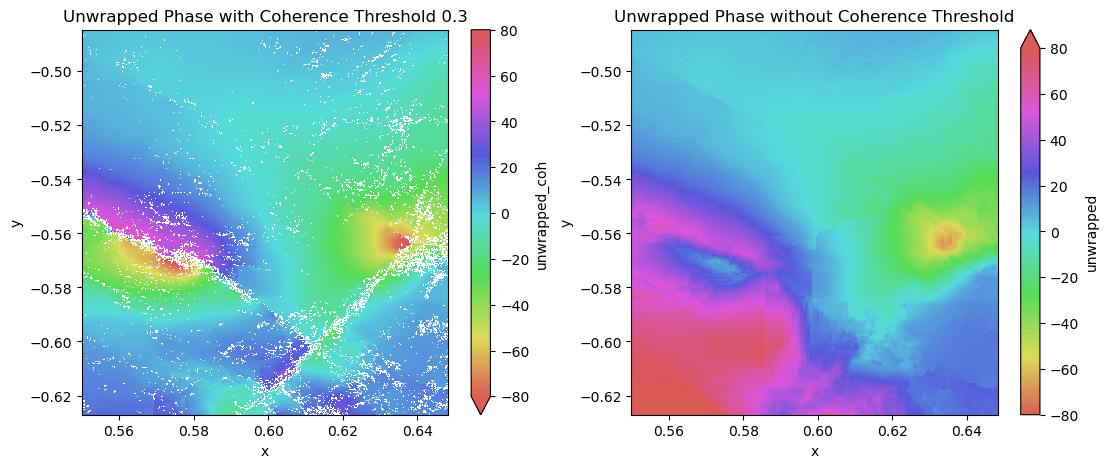

In [8]:
plot_compare_coherence_mask_presence(subset_unwrapped_coherence, cmap_cyc, threshold1)

Let's see if another threshold value for the coherence mask gives better results.


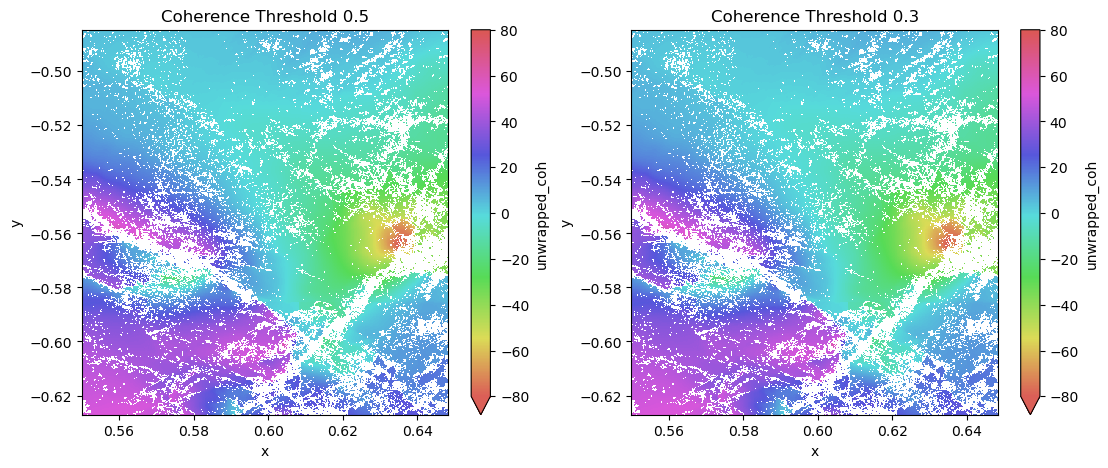

In [9]:
threshold2 = 0.5
subset_unwrapped_coherence_threshold2 = unwrap_array(
    subset,
    coherence=subset.coh,
    coh_low_threshold=threshold2,
    complex_var="cmplx",
    ouput_var="unwrapped_coh",
)


plot_different_coherence_thresholds(
    subset_unwrapped_coherence, subset_unwrapped_coherence_threshold2, cmap_cyc
)

A higher coherence threshold means that only pixels with a coherence value greater than 0.5 will be used for phase unwrapping. This would result in an unwrapping process that is likely more stable, with reduced noise (invalid phase information in the proximity of the earthquake faults is discarded). However, an excessive coherence threshold might have significant gaps or missing information, especially in areas where motion or surface changes have occurred.
The choice of a coherence threshold depends on the balance you want to strike between the accuracy and coverage of the output unwrapped image.

Keep in mind that in case of large displacements, such as the Ridgecrest earthquake, phase unwrapping can be problematic and lead to poor results: when the displacement is large, the phase difference becomes wrapped multiple times, leading to phase aliasing. In this case, the phase values become ambiguous, we cannot distinguish between multiple phase wraps, thus leading to incorrect results.

## Applying an Equation for the Displacement Map

From the unwrapped phase image (we will use the phase masked with a coherence threshold of 0.3) we can calculate the displacement map using the following equation:

$
d = - \frac{\lambda}{4 \cdot \pi} \cdot \Delta \phi_d
$

where:
- $\lambda = 0.056$ for Sentinel-1
- $\Delta \phi_d$ is the unwrapped image

This operation can be very useful for monitoring ground deformation.


In [10]:
def displacement(unw, lambda_val: float = 0.056) -> xr.DataArray:
    return unw * -lambda_val / (4 * np.pi)


# Calculate the displacement
disp_subset = displacement(subset.unwrapped_coh)

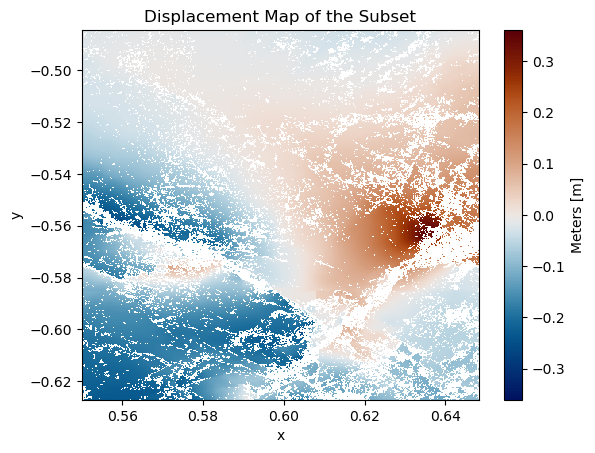

In [11]:
# Plot the displacement map
plot_displacement_map(disp_subset, cmap_disp, "Displacement Map of the Subset")

## Coarsen Approach

As the whole data is too large and the processing time already exceeds 20 minutes when using an image with 4000x4000 pixels, we can coarsen the image so that we can unwrap and compute the displacement for the whole scene.


In [12]:
kernel_size = 3

lowres = ds.coarsen(x=kernel_size, y=kernel_size, boundary="trim").median()

In [13]:
lowres = unwrap_array(
    lowres,
    ntiles=(20, 30),
    tile_overlap=10,
    coherence=lowres.coh,
    coh_low_threshold=0.3,
    complex_var="cmplx",
    ouput_var="unwrapped",
)

We can now plot the unwrapped image of the low resolution image.


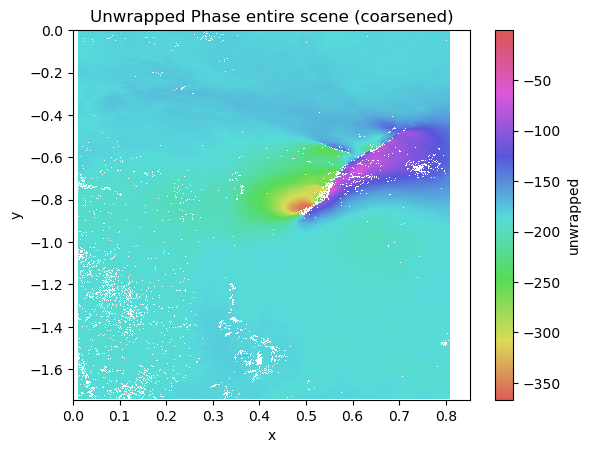

In [14]:
# Plot the unwrapped phase
plot_coarsened_image(lowres, cmap_cyc)

We can also now calculate the displacement map and compare them.


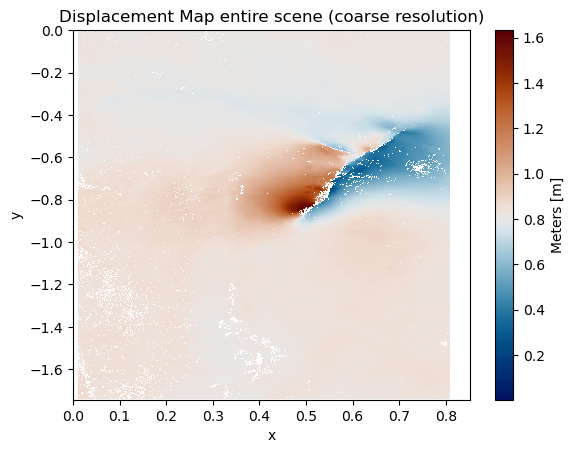

In [15]:
lowres_disp = displacement(lowres.unwrapped)

# Plot the displacement map
plot_displacement_map(
    lowres_disp, cmap_disp, "Displacement Map entire scene (coarse resolution)"
)

Plot a summary of the previous plots:


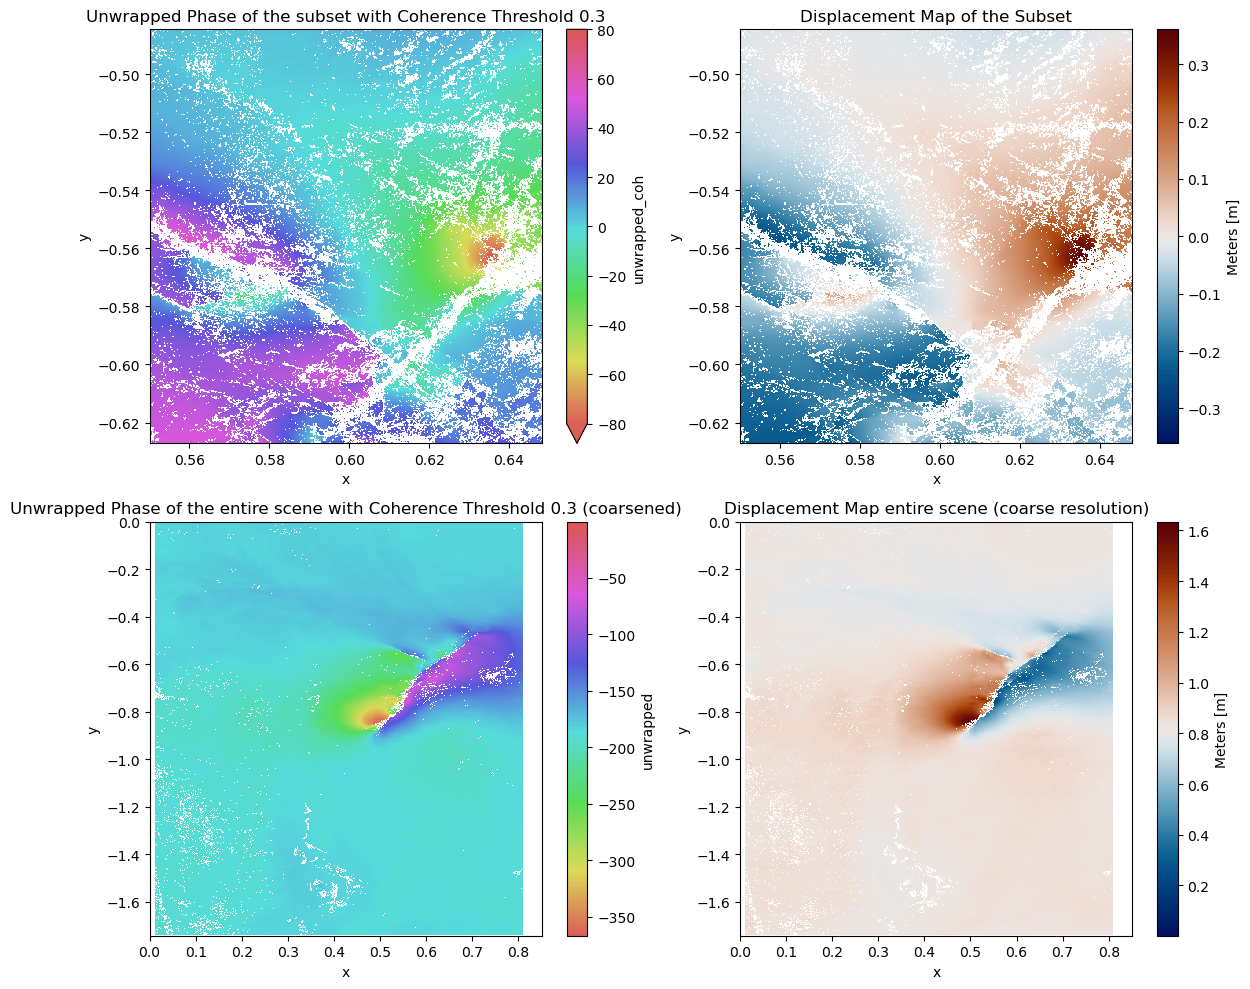

In [16]:
# Plot summary of previous plots
plot_summary(subset, disp_subset, lowres, lowres_disp, cmap_cyc, cmap_disp)

In the following animation, we can capture the 3D displacement caused by the Ridgecrest quake by observing the after and before elevation model.

![](../images/ridgecrest.gif)
*Credits: NASA*